<a href="https://colab.research.google.com/github/Zaidkarim6204/Portfolio-website/blob/main/amazon_sales_reprort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading 'Amazon Sale Report.csv'...

ERROR: The file 'Amazon Sale Report.csv' was not found. Please upload it to your Colab session first.


Loading 'Amazon Sale Report.csv'...


/tmp/ipython-input-804266527.py:12: ParserWarning: Skipping line 6681: unexpected end of data

  df = pd.read_csv(
/tmp/ipython-input-804266527.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


File loaded successfully!

Starting data cleaning process...
Data cleaning complete!
-----------------------------------------

Starting Exploratory Data Analysis...

Generating Chart 1: Total Sales by Month...


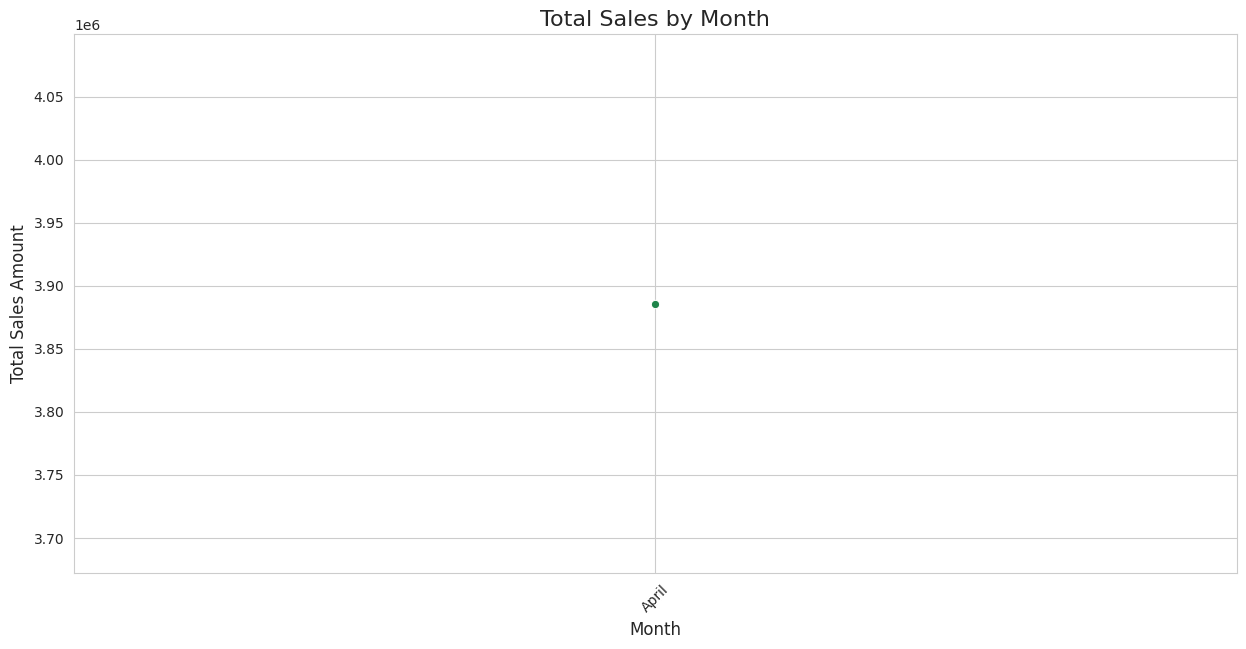


Generating Chart 2: Top 10 Product Categories by Sales...


/tmp/ipython-input-804266527.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


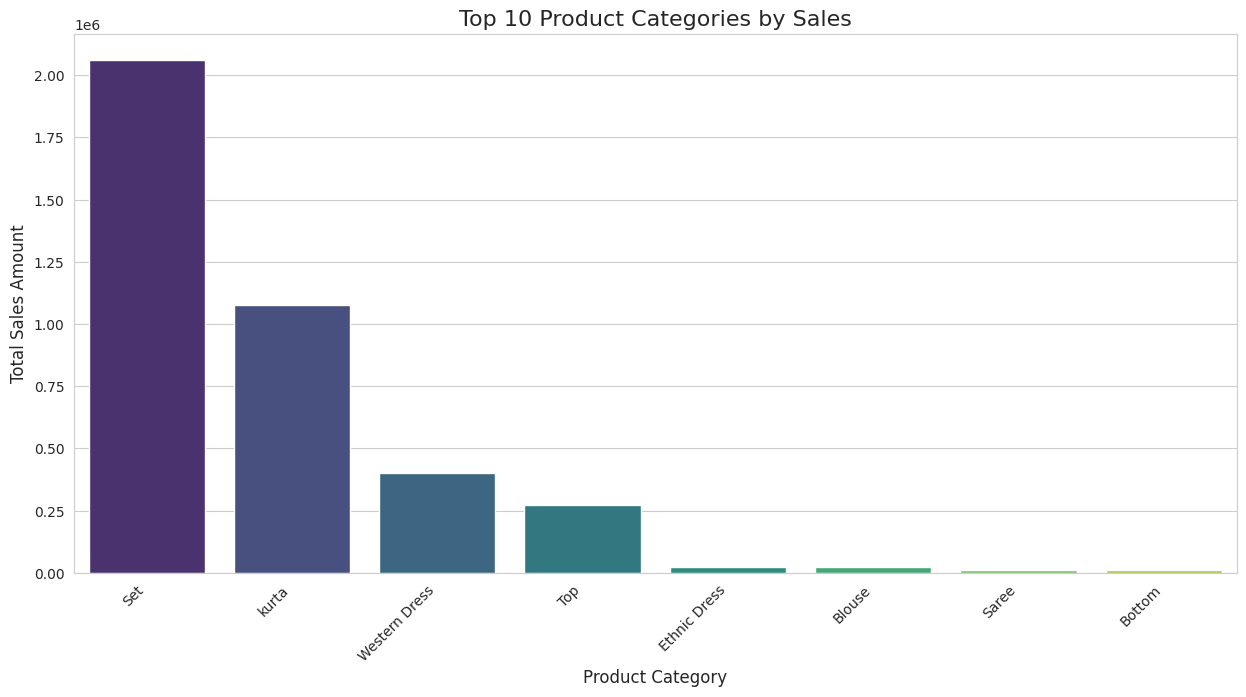


Generating Chart 3: Top 10 States by Sales...


/tmp/ipython-input-804266527.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')


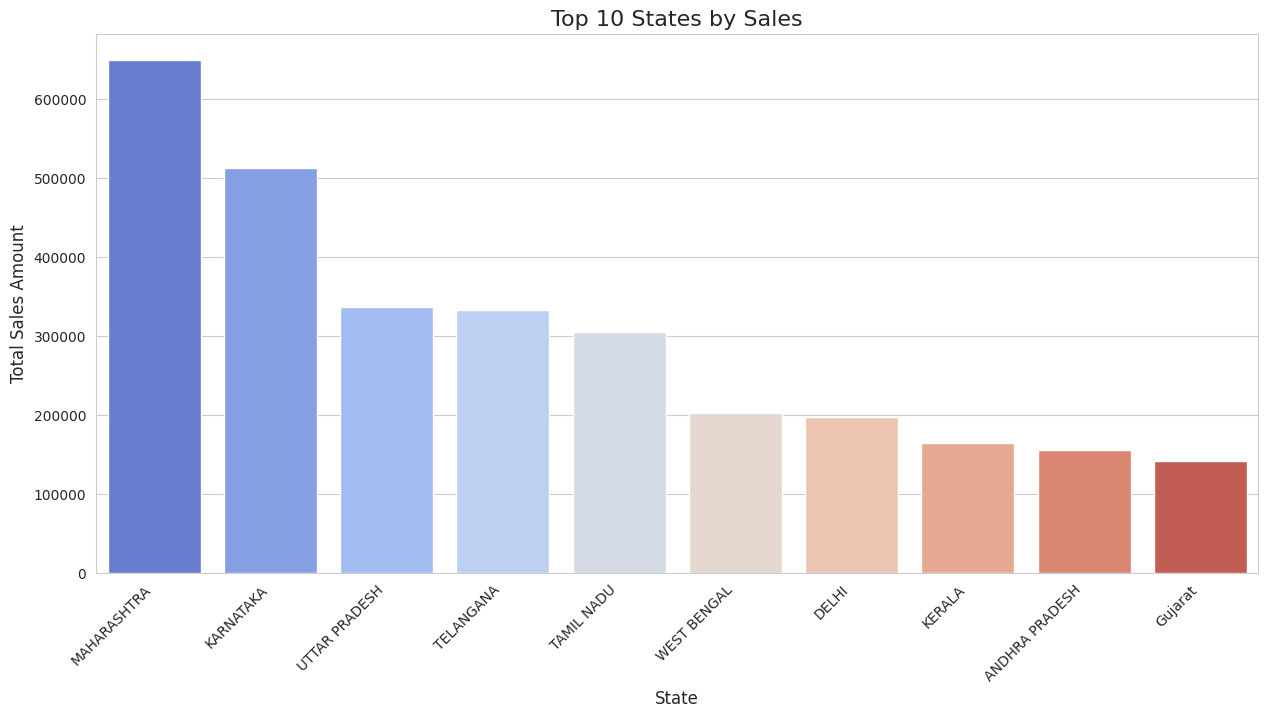

In [7]:
# --- Step 1: Import Libraries ---
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 2: Load the Data Robustly ---
file_name = 'Amazon Sale Report.csv'
print(f"Loading '{file_name}'...")

try:
    df = pd.read_csv(
        file_name,
        encoding='utf-8',
        sep=',',
        engine='python',
        on_bad_lines='warn'
    )
    print("File loaded successfully!")

    # --- Step 3: Clean the Data ---
    print("\nStarting data cleaning process...")

    # Drop unnecessary columns
    df.drop(['Unnamed: 22', 'index', 'fulfilled-by'], axis=1, inplace=True, errors='ignore')

    # Handle missing or zero 'Amount' values
    df.dropna(subset=['Amount'], inplace=True)
    df = df[df['Amount'] > 0]

    # Convert 'Date' column and handle errors
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)

    print("Data cleaning complete!")
    print("-----------------------------------------")

    # --- Step 4: Exploratory Data Analysis (EDA) & Visualization ---
    print("\nStarting Exploratory Data Analysis...")

    # Set a professional style for plots
    sns.set_style('whitegrid')

    # Chart 1: Monthly Sales Trend
    print("\nGenerating Chart 1: Total Sales by Month...")
    df['Month'] = df['Date'].dt.month_name()
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    monthly_sales = df.groupby('Month')['Amount'].sum().reindex(month_order)

    plt.figure(figsize=(15, 7))
    sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='#1E8449')
    plt.title('Total Sales by Month', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Sales Amount', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

    # Chart 2: Top 10 Product Categories
    print("\nGenerating Chart 2: Top 10 Product Categories by Sales...")
    top_categories = df.groupby('Category')['Amount'].sum().nlargest(10).sort_values(ascending=False)

    plt.figure(figsize=(15, 7))
    sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
    plt.title('Top 10 Product Categories by Sales', fontsize=16)
    plt.xlabel('Product Category', fontsize=12)
    plt.ylabel('Total Sales Amount', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Chart 3: Top 10 States by Sales
    print("\nGenerating Chart 3: Top 10 States by Sales...")
    top_states = df.groupby('ship-state')['Amount'].sum().nlargest(10).sort_values(ascending=False)

    plt.figure(figsize=(15, 7))
    sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')
    plt.title('Top 10 States by Sales', fontsize=16)
    plt.xlabel('State', fontsize=12)
    plt.ylabel('Total Sales Amount', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.show()

except FileNotFoundError:
  print(f"\nERROR: The file '{file_name}' was not found. Please upload it to your Colab session first.")
except Exception as e:
  print(f"\nAn error occurred: {e}")

In [8]:
print (df['Month'].unique())

['April']
